Swap test for an arbitrary nnumber of quantum states.
https://arxiv.org/pdf/2110.13261.pdf

In [79]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *

anc = QuantumRegister(1)
psi = QuantumRegister(2)
phi = QuantumRegister(2)
creg = ClassicalRegister(1)

QC = QuantumCircuit(anc, psi, phi, creg)

QC.h(anc[0])

StatePsi = QuantumCircuit(2)
StatePsi.h(0)
StatePsi.cx(0, 1)
UStatePsi = StatePsi.to_gate().control(1)

QC.append(UStatePsi, [anc[0], psi[0], psi[1]])

StatePhi = QuantumCircuit(2)
StatePhi.x(0)
StatePhi.h(0)
StatePhi.cx(0, 1)
UStatePhi = StatePhi.to_gate().control(1)

QC.x(anc[0])

QC.append(UStatePhi, [anc[0], phi[0], phi[1]])
QC.x(anc[0])
QC.barrier()

QC.h(anc[0])
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>

In [80]:

QC.measure(anc[0],creg[0])
QC.draw()


┌───┐                ┌───┐                ┌───┐ ░ ┌───┐┌─┐
  q196: ┤ H ├───────■────────┤ X ├───────■────────┤ X ├─░─┤ H ├┤M├
        └───┘┌──────┴───────┐└───┘       │        └───┘ ░ └───┘└╥┘
q197_0: ─────┤0             ├────────────┼──────────────░───────╫─
             │  circuit-782 │            │              ░       ║ 
q197_1: ─────┤1             ├────────────┼──────────────░───────╫─
             └──────────────┘     ┌──────┴───────┐      ░       ║ 
q198_0: ──────────────────────────┤0             ├──────░───────╫─
                                  │  circuit-792 │      ░       ║ 
q198_1: ──────────────────────────┤1             ├──────░───────╫─
                                  └──────────────┘      ░       ║ 
 c23: 1/════════════════════════════════════════════════════════╩═
                                                                0

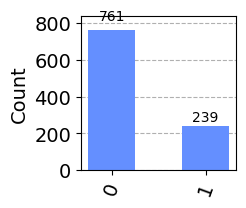

In [81]:
nShots = 1000
backend = Aer.get_backend('aer_simulator_statevector') 
result = backend.run(transpile(QC, backend), shots=nShots).result()
counts = result.get_counts()

plot_histogram(result.get_counts(), figsize=(2,2))

In [82]:
if '0' in counts:
    p0 = counts['0']
else:
    p0 = 0
    
s = 2*(p0/nShots)-1

print("Squared Inner Product:",str(s))

Squared Inner Product: 0.522
